## Sentiment Analysis of IMDB Movies Review dataset

In [1]:
#Call libraries
%reset -f
import numpy as np
import pandas as pd
import os

In [2]:
# set the path for the files
path_neg = "D:\ShreeTechnical\MLDL\Classes\EX\ex13/train/neg"
path_pos = "D:\ShreeTechnical\MLDL\Classes\EX\ex13/train/pos"

In [3]:
# 2.1 Define a function to read all files
#     in a file-list
def readFiles(fileList):
    lines = []
    # 4.1.1 For every file in the directory:
    for i in fileList:
        # 4.1.2 Open it and coalesce into one string
        text_file = open(i, "r",  encoding="utf8")
        tx = text_file.readlines()
        tx = " ".join(tx)
        lines.append(tx)
    return(lines)

In [4]:
# 3.0 Read all files in 'neg' folder
os.chdir(path_neg)
neg_fileList = os.listdir()
neg_fileList[:3]
neg_files_list = readFiles(neg_fileList)

In [5]:
# 4.0 Read all files in 'pos' folder
os.chdir(path_pos)
pos_fileList = os.listdir()
pos_fileList[:3]
pos_files_list = readFiles(pos_fileList)

In [6]:
# 5.0 Merge the two lists
comb_files = neg_files_list + pos_files_list

In [7]:
# 5.1 Create target labels
t = [0] * 1000 + [1] * 1000

In [8]:
len(comb_files)

2000

__Cleaning__

In [9]:
# 1.4 Text processing
# 1.4.1 Import 're' module for
#       regular expression matching
import re
import os
import string  # To use string methods and constants

In [10]:
# 4.3 Clean the list of strings
def cleanTxt(listOfStrings):
    lines = []
    for tx in listOfStrings:
        # 4.3.1 Clean each string through a series
        #     of cleaning operations
        clean = re.compile('<.*?>')
        tx = re.sub(clean, '', tx)
        # 4.3.2 Replace bracketed numbers with space
        tx= re.sub(r'[\[0-9\]]',' ', tx)
        tx= re.sub('\n',' ', tx)
        tx= re.sub('\'s',' ', tx)
        tx= re.sub('\'s',' ', tx)
        # 4.3.3 Replace URLs
        tx = re.sub(r'^https?:\/\/.*[\r\n]*', '', tx, flags=re.MULTILINE)
        tx = re.sub('[*|\(\)\{\}]', " ",tx)
        tx = re.sub('[=]*', "",tx)
        # 4.3.4 Replace other tags generally part of a web-file
        clean = re.compile('&lt;')
        tx = re.sub(clean, '', tx)
        clean = re.compile('&gt;')
        tx = re.sub(clean, '', tx)
        clean = re.compile('&quot;')
        tx = re.sub(clean, '', tx)
        # Remove any punctuation marks
        tx = tx.translate(tx.maketrans("","",string.punctuation))
        lines.append(tx)
    return lines

In [11]:
xx = cleanTxt(comb_files)

In [13]:
type(xx)

list

In [14]:
len(xx)

2000

__Stemming__

In [15]:
from nltk.stem.porter import PorterStemmer

In [16]:
# Instantiate PorterStemmer object
porter_stemmer = PorterStemmer()

In [17]:
#Define a function to use NLTK's PorterStemmer
def stemming_tokenizer(str_input):
    words = str_input.split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [18]:
new_lines = []
for line in xx:
    stemmed_line = stemming_tokenizer(line)
    stemmed_line = " ".join(stemmed_line)    # Join words back into a string
    new_lines.append(stemmed_line)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [20]:
## 8.0 Transform text to tf-idf matrix
vec = TfidfVectorizer(use_idf=True,
                      strip_accents = 'unicode', # Remove accents during preprocessing step.
                      lowercase = True,
                      tokenizer=stemming_tokenizer,
                      max_features = 10000,   # Consider only top frequent features
                      stop_words='english'  # Remove stop-words
                      )

In [21]:
data = vec.fit_transform(new_lines)

C:\Users\Shree\Shri\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_word

In [22]:
data

<2000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 442538 stored elements in Compressed Sparse Row format>

In [23]:
data.shape

(2000, 10000)

In [24]:
df = pd.DataFrame(data.toarray(), columns=vec.get_feature_names())

In [25]:
df.shape

(2000, 10000)

In [26]:
df.head()

,,aaron,abandon,abbi,abduct,aberdeen,abigail,abil,abl,abli,...,zip,zoe,zombi,zone,zoo,zooland,zoom,zorro,zucker,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039943,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df['target_var'] = t

In [28]:
df.shape

(2000, 10001)

In [78]:
df.head()

,,aaron,abandon,abbi,abduct,aberdeen,abigail,abil,abl,abli,...,zoe,zombi,zone,zoo,zooland,zoom,zorro,zucker,zwick,target_var
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039943,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


__Modelling__

In [29]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support

In [30]:
X = df.iloc[:,0:10000]
y = df.iloc[:,10000]

In [31]:
X.head()

,,aaron,abandon,abbi,abduct,aberdeen,abigail,abil,abl,abli,...,zip,zoe,zombi,zone,zoo,zooland,zoom,zorro,zucker,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039943,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_var, dtype: int64

In [51]:
X_train, X_test, y_train, y_test =   train_test_split(X,
                                                      y,
                                                      test_size = 0.2,
                                                      shuffle = True
                                                      )


X_train.shape

(1600, 10000)

In [52]:
y_train.shape

(1600,)

In [53]:
X_test.shape

(400, 10000)

In [54]:
y_test.shape

(400,)

In [55]:
X.columns

Index(['', 'aaron', 'abandon', 'abbi', 'abduct', 'aberdeen', 'abigail',
       'abil', 'abl', 'abli',
       ...
       'zip', 'zoe', 'zombi', 'zone', 'zoo', 'zooland', 'zoom', 'zorro',
       'zucker', 'zwick'],
      dtype='object', length=10000)

__XGB Classifier__

In [56]:
xg = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 5,
                   reg_lambda= 0.1
                   )

In [57]:
xg_sen = xg.fit(X_train,y_train)

In [58]:
y_pred_xg_sen = xg_sen.predict(X_test)

In [59]:
y_pred_xg_sen_prob = xg_sen.predict_proba(X_test)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [61]:
accuracy_score(y_test,y_pred_xg_sen)

0.8

In [68]:
fpr_xg, tpr_xg, thresholds = roc_curve(y_test,
                                 y_pred_xg_sen_prob[: , 1],
                                 pos_label= 1
                                 )

In [69]:
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg_sen)

In [70]:
print (auc(fpr_xg,tpr_xg))

0.8893639363936394


In [72]:
import matplotlib.pyplot as plt

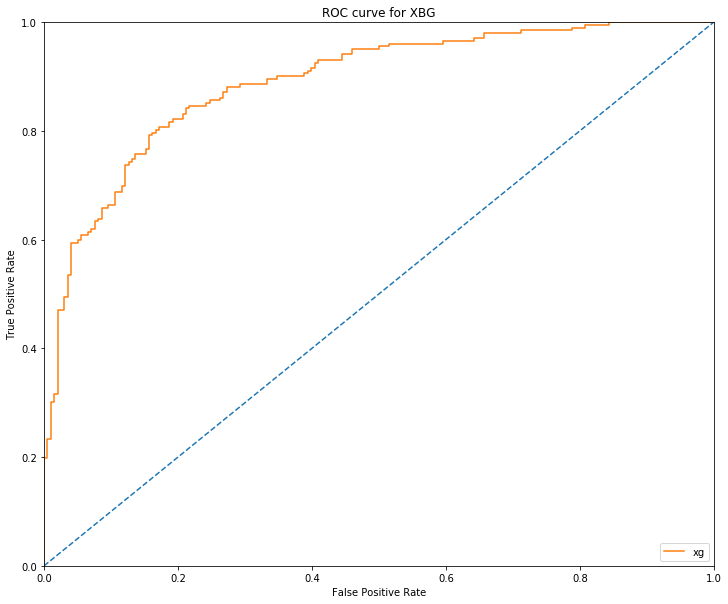

In [73]:
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for XBG')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_xg, tpr_xg, label = "xg")
# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()

__Random Forest__

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators=100)

In [64]:
rf_sen = rf.fit(X_train,y_train)

In [65]:
y_pred_rf_sen = rf_sen.predict(X_test)

In [66]:
y_pred_rf_sen_prob = rf_sen.predict_proba(X_test)

In [67]:
accuracy_score(y_test,y_pred_rf_sen)

0.7775

In [74]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_sen_prob[: , 1],
                                 pos_label= 1
                                 )

In [75]:
p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf_sen)

In [76]:
print (auc(fpr_rf,tpr_rf))

0.8651990199019901


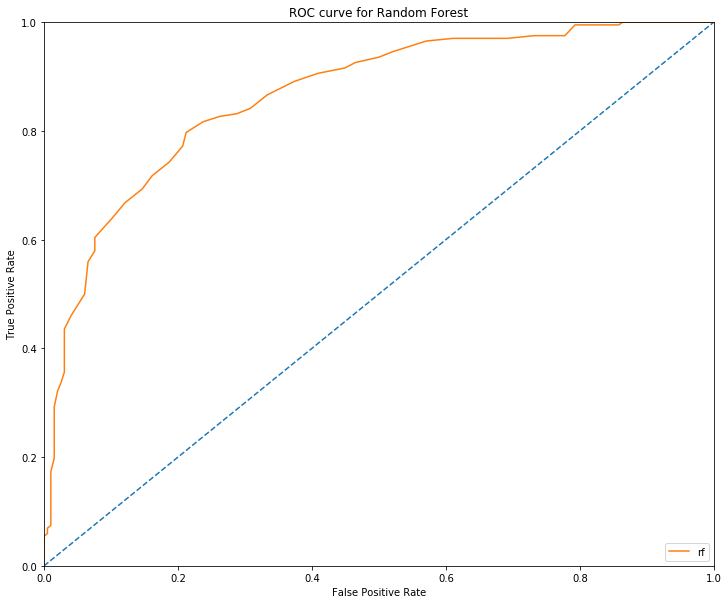

In [89]:
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Random Forest')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_rf, tpr_rf, label = "rf")
# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

In [81]:
nb_sen = nb.fit(X_train,y_train)

In [82]:
y_pred_nb_sen = nb_sen.predict(X_test)

In [83]:
y_pred_nb_sen_prob = nb_sen.predict_proba(X_test)

In [84]:
accuracy_score(y_test,y_pred_nb_sen)

0.81

In [85]:
fpr_nb, tpr_nb, thresholds = roc_curve(y_test,
                                 y_pred_nb_sen_prob[: , 1],
                                 pos_label= 1
                                 )

In [86]:
p_nb,r_nb,f_nb,_ = precision_recall_fscore_support(y_test,y_pred_nb_sen)

In [87]:
print (auc(fpr_nb,tpr_nb))

0.878962896289629


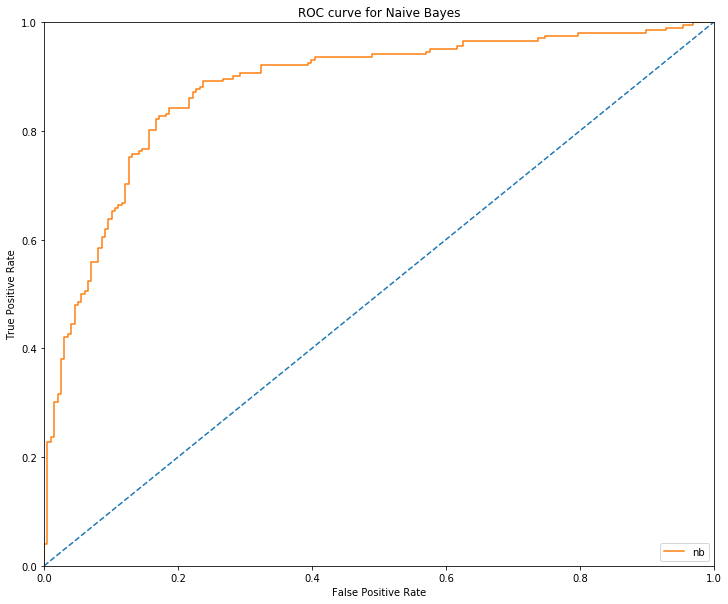

In [88]:
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Naive Bayes')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_nb, tpr_nb, label = "nb")
# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()